# EEG FRONTAL:  read and plot the data from HDF5

In [1]:
# import useful packages
import os

import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# read hdf5 
fname = '../data/bitalino_eeg_A1.hdf5'
with pd.HDFStore(fname, 'r') as store: 
    print(store.keys())
    eeg_filtered = pd.read_hdf(store, '/eeg/filtered')
    eeg_powers = pd.read_hdf(store, '/eeg/powers')
    eeg_blinks = pd.read_hdf(store, '/eeg/blinks')

['/bitalino', '/eeg/blinks', '/eeg/filtered', '/eeg/powers']


Text(0.5, 0.98, 'Data from file bitalino_eeg_A1.hdf5')

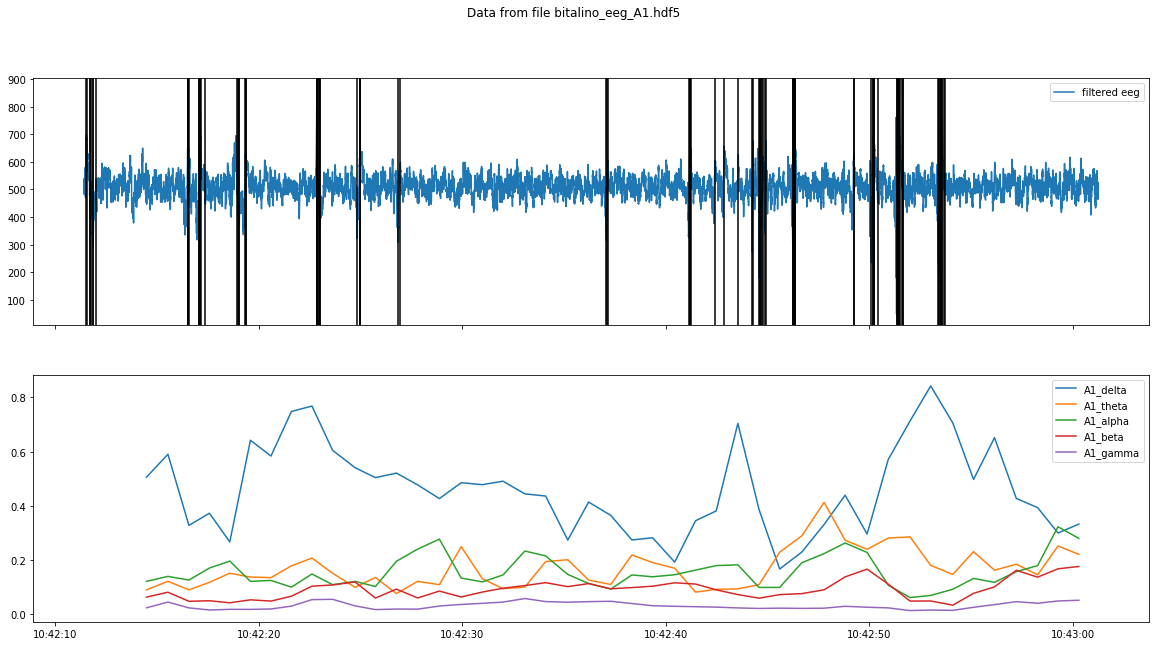

In [3]:
f, ax = plt.subplots(2, 1, sharex=True, figsize=(20, 10))
ax[0].plot(eeg_filtered.A1)
ax[0].legend(['filtered eeg'], loc=1)
for blink_onset in eeg_blinks[eeg_blinks.A1!= 0.0].index:
    ax[0].axvline(blink_onset, color='k')
ax[1].plot(eeg_powers)
ax[1].legend(eeg_powers.columns, loc=1)

plt.suptitle(f'Data from file {os.path.basename(fname)}')